In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/netflix-stock-price-prediction/NFLX.csv


In [33]:
df = pd.read_csv("/kaggle/input/netflix-stock-price-prediction/NFLX.csv")

In [34]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [35]:
viz = df.copy()

In [36]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [37]:
df.shape

(1009, 7)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [40]:
train, test = train_test_split(df, test_size = 0.2)

In [41]:
test_pred = test.copy()

In [42]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
477,2019-12-27,332.959991,333.820007,326.010010,329.089996,329.089996,5036100
198,2018-11-15,285.510010,292.500000,282.160004,290.059998,290.059998,9967100
888,2021-08-16,515.239990,523.380005,512.299988,517.919983,517.919983,2032800
239,2019-01-17,349.500000,355.790009,346.410004,353.190002,353.190002,18871200
358,2019-07-10,382.769989,384.339996,362.679993,381.000000,381.000000,5878800


In [43]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
924,2021-10-06,628.179993,639.869995,626.359985,639.099976,639.099976,4580400
49,2018-04-17,329.660004,338.619995,323.769989,336.059998,336.059998,33866500
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
111,2018-07-16,398.980011,403.359985,391.750000,400.480011,400.480011,22960000
702,2020-11-17,480.119995,487.510010,478.850006,480.630005,480.630005,3698100


In [44]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [45]:
y_train = train['Close'].values
y_test = test['Close'].values

In [46]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred = model_lnr.predict(x_test)

In [48]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)

[257.66721496]


In [49]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 14.066
RMSE 3.75
MAE 2.814
MAPE 0.007
R2 Score :  0.999


In [50]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

In [51]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [52]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


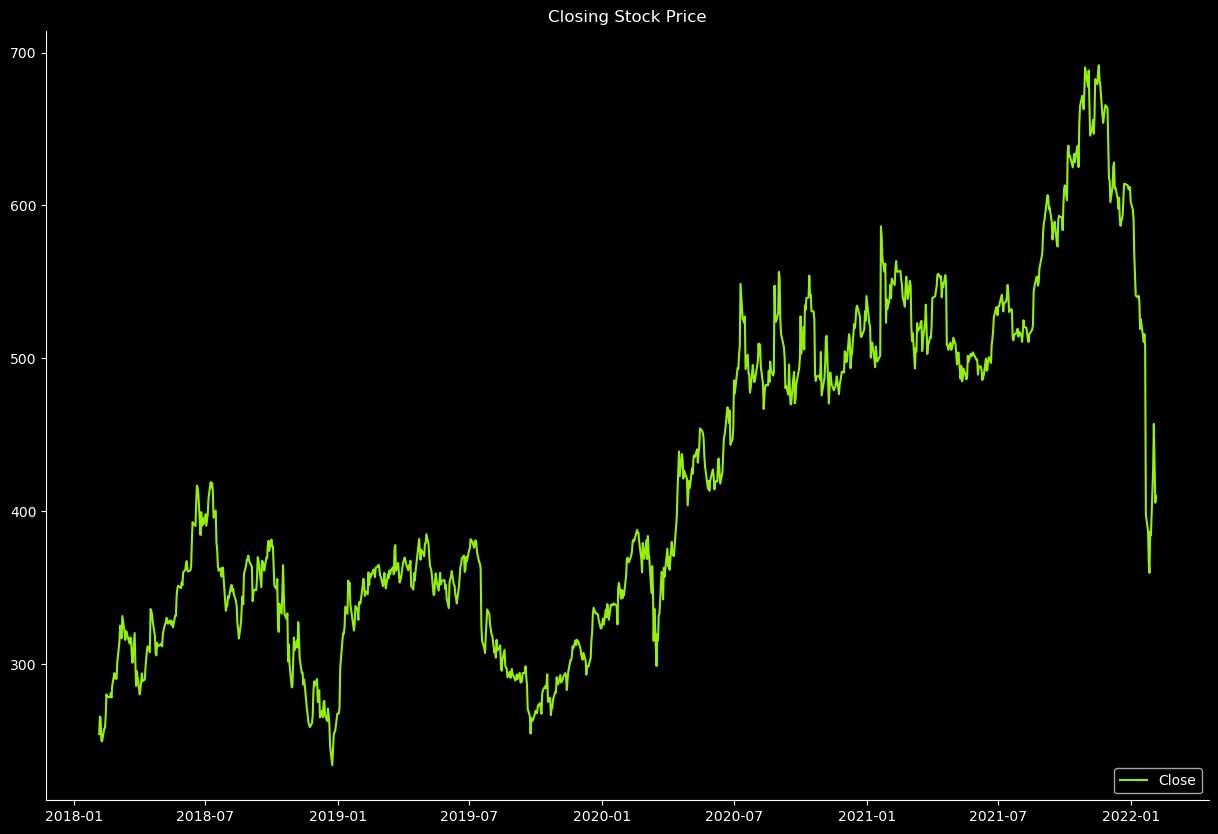

In [53]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

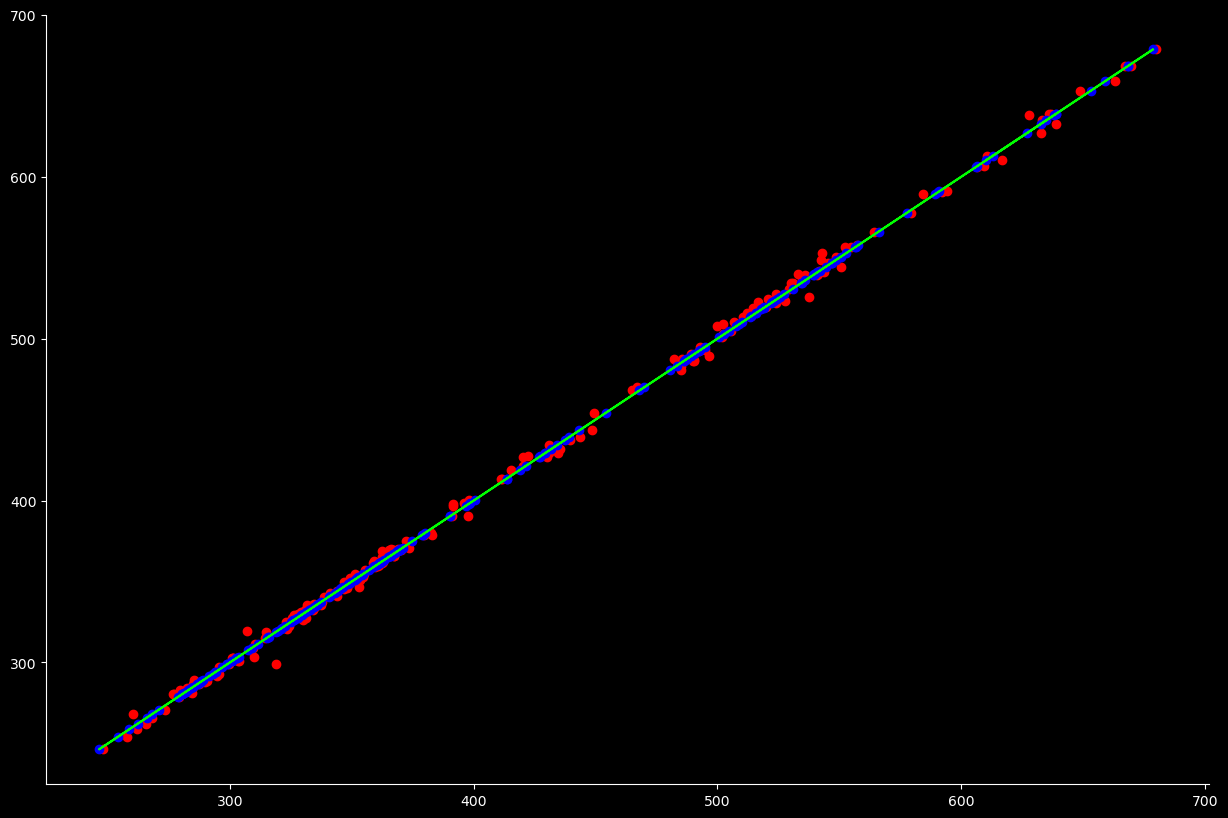

In [54]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [55]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
924,2021-10-06,628.179993,639.869995,626.359985,639.099976,639.099976,4580400,635.984867
49,2018-04-17,329.660004,338.619995,323.769989,336.059998,336.059998,33866500,334.504729
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,420.265928
111,2018-07-16,398.980011,403.359985,391.750000,400.480011,400.480011,22960000,398.306118
702,2020-11-17,480.119995,487.510010,478.850006,480.630005,480.630005,3698100,484.902006
...,...,...,...,...,...,...,...,...
956,2021-11-19,692.349976,694.159973,675.000000,678.799988,678.799988,2613700,679.960159
796,2021-04-06,544.809998,554.169983,543.299988,544.530029,544.530029,3474200,550.930164
247,2019-01-30,332.750000,341.779999,330.799988,340.660004,340.660004,9234500,338.660098
550,2020-04-14,397.500000,417.820007,394.850006,413.549988,413.549988,11581000,411.784783


In [56]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,415.509900,110.352663,246.389999,329.172493,369.639999,513.667511,678.799988
Close_Prediction,202.0,415.206339,110.111065,247.827842,329.373027,367.773728,511.703793,679.960159


In [57]:
test_pred[['Close', 'Close_Prediction']]

,Close,Close_Prediction
924,639.099976,635.984867
49,336.059998,334.504729
1004,427.140015,420.265928
111,400.480011,398.306118
702,480.630005,484.902006
...,...,...
956,678.799988,679.960159
796,544.530029,550.930164
247,340.660004,338.660098
550,413.549988,411.784783
